A typical NLP pipeline:
1. Data Acquistion
2. Text Cleaning e.g. spell checking with Bing Spell Check REST API and Python https://docs.microsoft.com/en-us/azure/cognitive-services/bing-spell-check/quickstarts/python
3. Pre-Processing e.g. remove special characters & digits, sentence segmentation, word tokenisation, lowercase, stop word removal, stemming, lemmatisation, POS tagging
4. Feature Engineering
5. Modeling
6. Evaluation
7. Deployment
8. Monitoring and Model Updating

Notes:
- language-specific exceptions can be specified in the tokenizer provided by spaCy e.g. N.Y. It’s also possible in spaCy to develop custom rules to handle such exceptions for languages that have high inflections (prefixes or suffixes) and complex morphology. 
-  For identifying specific patterns (e.g., dates or money expressions), well-formed regular expressions are the first step.

In [1]:
import os
import pandas as pd
import numpy as np
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [41]:
home_path = os.path.expanduser("~")
fp = f'{home_path}/git/30-days-of-NLP/notebooks/Data/bbc-text.csv'
df = pd.read_csv(fp)

In [42]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [43]:
print(f'Number of documents in dataset: {len(df)}')

Number of documents in dataset: 2225


There are 5 classes in the dataset

In [44]:
df['category'].unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

The number of examples in each class is:

In [45]:
df.groupby('category').count()

,text
category,
business,510
entertainment,386
politics,417
sport,511
tech,401


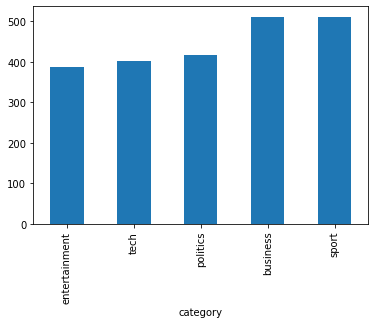

In [46]:
df.groupby('category').size().sort_values().plot.bar();

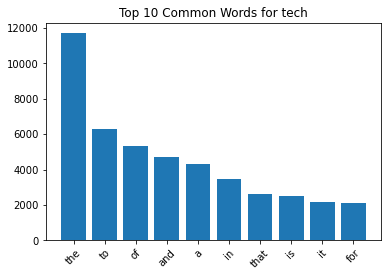

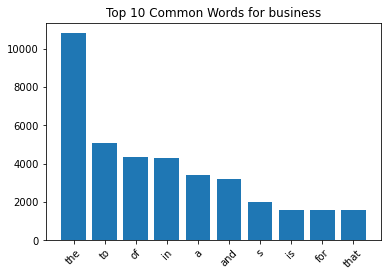

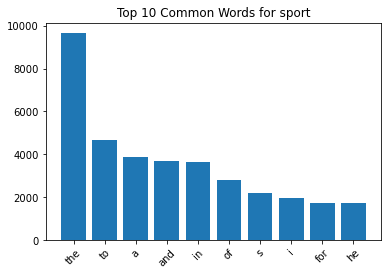

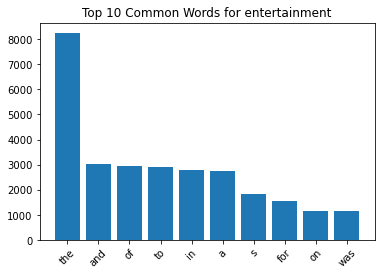

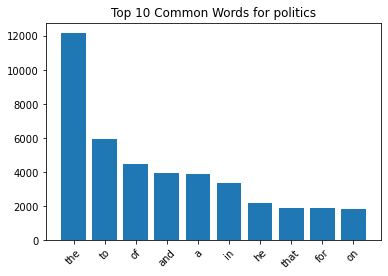

In [51]:
def plot_common_words(text, category):
    text_dict = dict(text)
    plt.bar(text_dict.keys(), text_dict.values())
    plt.title(f'Top 10 Common Words for {category}')
    plt.xticks(rotation=45)
    plt.show()

categories = df.groupby('category')
for category in df.category.unique():
    text = ' '.join(categories.get_group(category)['text'])
    common_words = Counter(text.split()).most_common(10)
    plot_common_words(common_words, category)

Let's look in the politics text:

In [52]:
print(category)
# Are digits/punctuation?
regexp = re.compile('[^a-z A-Z]+') # ^ means not a-z or A-Z or ' ' important to include the space!
punc = [s for t in text for s in t if regexp.search(s)]
print(f'Number of non-character text: {len(punc)}')
Counter(punc)

politics
Number of non-character text: 18894


Counter({'.': 8852,
         '-': 2095,
         '4': 389,
         ':': 675,
         '£': 383,
         '3': 354,
         '5': 503,
         '1': 1027,
         '0': 1974,
         '7': 269,
         '2': 760,
         '6': 271,
         '8': 256,
         '%': 207,
         '9': 456,
         '[': 28,
         ']': 28,
         '(': 110,
         ')': 111,
         ';': 47,
         '$': 12,
         '/': 23,
         '&': 18,
         '#': 7,
         '!': 34,
         '+': 2,
         '=': 2,
         '`': 1})

### Preprocessing
lowercase, remove stopwords, digits and punctunation. Return word tokenised data

In [53]:
from nltk.corpus import stopwords
import nltk
import string
def preprocess_corpus(texts):
    mystopwords = set(stopwords.words('english'))
    def remove_stops_digits(tokens):
        return[token.lower() for token in tokens if token not in mystopwords and 
               not token.isdigit() and token not in string.punctuation]
    return remove_stops_digits(nltk.word_tokenize(texts))

[('said', 1567), ('people', 960), ('also', 537), ('new', 517), ('mr', 509), ('technology', 504), ('one', 498), ('would', 471), ('could', 469), ('mobile', 467)]


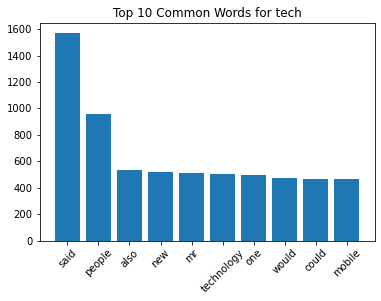

[('said', 1680), ('us', 813), ('year', 637), ('mr', 600), ('would', 463), ('also', 440), ('market', 425), ('new', 416), ('company', 415), ('growth', 384)]


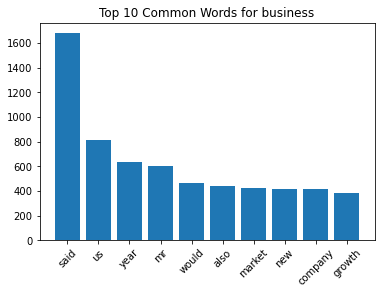

[('said', 941), ('game', 476), ('england', 459), ('first', 437), ('win', 415), ('would', 396), ('world', 379), ('last', 376), ('one', 355), ('two', 351)]


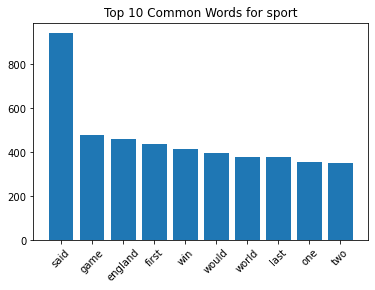

[('said', 825), ('film', 753), ('best', 591), ('music', 435), ('also', 398), ('us', 369), ('year', 368), ('one', 362), ('show', 328), ('new', 322)]


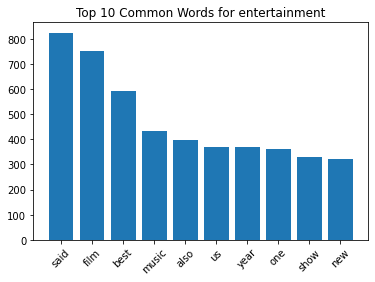

[('said', 2241), ('mr', 1678), ('would', 1051), ('labour', 760), ('government', 730), ('people', 623), ('blair', 573), ('party', 569), ('election', 565), ('also', 452)]


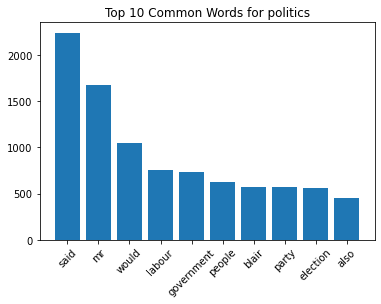

In [58]:
categories = df.groupby('category')
for category in df.category.unique():
    text_s = categories.get_group(category)['text']
    text_clean = text_s.apply(preprocess_corpus)
    corpus = [''.join(j) for i in text_clean for j in i]
    common_words = Counter(corpus).most_common(10)
    print(common_words)
    plot_common_words(common_words, category)

Plot wordcloud from the first row of text in the dataframe

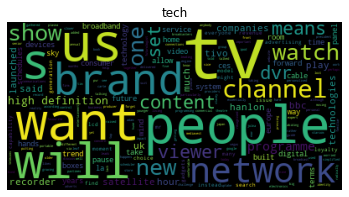

In [9]:
def plot_wordcloud(text, title):
    wordcloud = WordCloud().generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(title)
    plt.show()

text = df.text[0]
category = df.category[0]
plot_wordcloud(text, category)

What about word clouds for all the text in each category

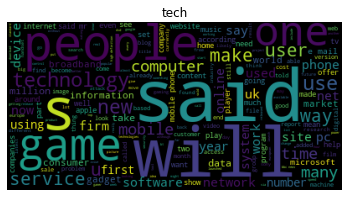

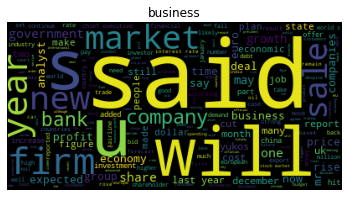

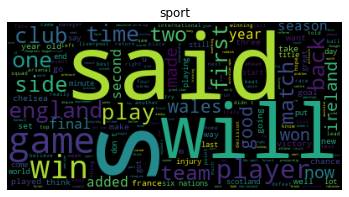

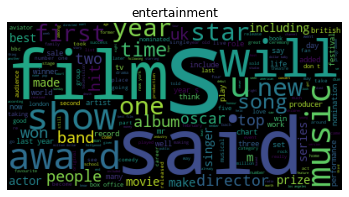

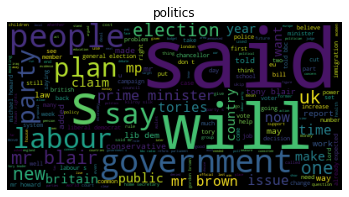

In [68]:
for category in df.category.unique():
    text = ' '.join(categories.get_group(category)['text'])
    plot_wordcloud(text, category)

Looks like said and will come up very often in all categories.

These are words we will want to remove.